# <u>Group 8</u>: Olympics Medals

## 1. Import Libraries

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
headers={"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                  "AppleWebKit/537.36 (KHTML, like Gecko) "
                  "Chrome/120.0.0.0 Safari/537.36"}
url="https://en.wikipedia.org/wiki/All-time_Olympic_Games_medal_table"
response=requests.get(url,headers=headers)
soup=BeautifulSoup(response.content,"html.parser")

In [3]:
print(response.status_code)

200


## 2. Table Scraping

### 2.1. Top 10 Medal Rankings (combined NOCs)

In [4]:
tables=soup.find_all("table", class_="wikitable sortable")
# tables
for i, table in enumerate(tables):
    heading=table.find_previous(["h2", "h3"])
    heading_text=heading.get_text(strip=True) if heading else "No heading"
    print(f"Index {i}: {heading_text}")

Index 0: Summer Olympics (including precursors)
Index 1: Summer Olympics (excluding precursors)
Index 2: Winter Olympics (including precursors)
Index 3: Winter Olympics (excluding precursors)
Index 4: Total, all Olympics (including precursors)
Index 5: Total, all Olympics (excluding precursors)
Index 6: Australasia
Index 7: British West Indies
Index 8: Czechoslovakia
Index 9: Germany
Index 10: Kuwait
Index 11: Netherlands Antilles
Index 12: China
Index 13: Russian Federation and the Soviet Union
Index 14: Russian Federation and the Soviet Union
Index 15: Yugoslavia


### Total, all Olympics (including precursors)

In [5]:
table=tables[4]
# print(table)
headers=[th.get_text(strip=True) for th in table.find("tr").find_all("th")]
# headers
rows=[]
for tr in table.find("tbody").find_all("tr"):
    th=tr.find("th")
    tds=tr.find_all("td")
    if not th or not tds:
        continue
    row=[th.get_text(strip=True)]+[td.get_text(strip=True) for td in tds]
    rows.append(row)
df_includeTol=pd.DataFrame(rows,columns=headers)
df_includeTol.head(10)

,No.,Nation,Gold,Silver,Bronze,Total
0,1,United States,"1,219","1,000",876,"3,095"
1,2,Russia[I],748,635,627,"2,010"
2,3,Germany[II],613,624,617,"1,854"
3,4,China,325,258,221,804
4,5,Great Britain,310,344,360,"1,014"
5,6,France,280,320,354,954
6,7,Italy,271,244,284,799
7,8,Sweden,216,232,242,690
8,9,Norway,213,187,176,576
9,10,Japan,206,191,221,618


### Total, all Olympics (excluding precursors)

In [6]:
table=tables[5]
# print(table)
headers=[th.get_text(strip=True) for th in table.find("tr").find_all("th")]
# headers
rows=[]
for tr in table.find("tbody").find_all("tr"):
    th=tr.find("th")
    tds=tr.find_all("td")
    if not th or not tds:
        continue
    row=[th.get_text(strip=True)]+[td.get_text(strip=True) for td in tds]
    rows.append(row)
df_excludeTol=pd.DataFrame(rows,columns=headers)
df_excludeTol.head(10)

,No.,Nation,Gold,Silver,Bronze,Total
0,1,United States,"1,219","1,000",876,"3,095"
1,2,Soviet Union,473,376,355,"1,204"
2,3,China,325,258,221,804
3,4,Germany,318,317,320,955
4,5,Great Britain,310,344,360,"1,014"
5,6,France,280,320,354,954
6,7,Italy,271,244,284,799
7,8,Sweden,216,232,242,690
8,9,Norway,213,187,176,576
9,10,Japan,206,191,221,618


### 2.2 Complete ranked medals (excluding precursors)

In [7]:
tables=soup.find_all("table", class_="wikitable sortable sticky-header-multi plainrowheaders jquery-tablesorter")
# tables
for i, table in enumerate(tables):
    heading = table.find_previous(["h2", "h3"])
    heading_text = heading.get_text(strip=True) if heading else "No heading"
    print(f"Index {i}: {heading_text}")

Index 0: Summer Olympics (1896–2024)
Index 1: Winter Olympics (1924–2022)
Index 2: Combined total (1896–2024)


### Summer Olympics (1896-2024)

In [8]:
table=tables[0]
headers=["Rank", "NOC", "Gold", "Silver", "Bronze", "Total"]
rows=[]
current_rank=None
for tr in table.find_all("tr")[1:]:
    tds=tr.find_all("td")
    th=tr.find("th")
    if not tds or not th:
        continue
    if len(tds)==5:
        current_rank=tds[0].get_text(strip=True)
        country=th.get_text(strip=True)
        medal=[td.get_text(strip=True) for td in tds[1:]]
    elif len(tds)==4:
        country=th.get_text(strip=True)
        medal=[td.get_text(strip=True) for td in tds]
    else:
        continue
    if country.startswith("Totals"):
        continue
    row=[current_rank, country]+medal
    rows.append(row)
df_completeSum=pd.DataFrame(rows, columns=headers)
df_completeSum

,Rank,NOC,Gold,Silver,Bronze,Total
0,1,United States,"1,105",879,781,"2,765"
1,2,Soviet Union*,395,319,296,"1,010"
2,3,China,303,226,198,727
3,4,Great Britain,298,339,343,980
4,5,France,239,278,299,816
...,...,...,...,...,...,...
155,151,Guyana,0,0,1,1
156,151,Iraq,0,0,1,1
157,151,Mauritius,0,0,1,1
158,151,Refugee Olympic Team*,0,0,1,1


### Winter Olympics (1924-2022)

In [9]:
table=tables[1]
headers=["Rank", "NOC", "Gold", "Silver", "Bronze", "Total"]
rows=[]
current_rank=None
for tr in table.find_all("tr")[1:]:
    tds=tr.find_all("td")
    th=tr.find("th")
    if not tds or not th:
        continue
    if len(tds)==5:
        current_rank=tds[0].get_text(strip=True)
        country=th.get_text(strip=True)
        medal=[td.get_text(strip=True) for td in tds[1:]]
    elif len(tds)==4:
        country=th.get_text(strip=True)
        medal=[td.get_text(strip=True) for td in tds]
    else:
        continue
    if country.startswith("Totals"):
        continue
    row=[current_rank, country]+medal
    rows.append(row)
df_completeWin=pd.DataFrame(rows, columns=headers)
df_completeWin

,Rank,NOC,Gold,Silver,Bronze,Total
0,1,Norway,148,134,123,405
1,2,United States,114,121,95,330
2,3,Germany,105,97,65,267
3,4,Soviet Union*,78,57,59,194
4,5,Canada,77,72,76,225
5,6,Austria,71,88,91,250
6,7,Sweden,65,51,60,176
7,8,Switzerland,63,47,58,168
8,9,Netherlands,53,49,45,147
9,10,Russia,46,39,35,120


### Combined total (1896-2024)

In [10]:
table=tables[2]
headers=["Rank", "NOC", "Gold", "Silver", "Bronze", "Total"]
rows=[]
current_rank=None
for tr in table.find_all("tr")[1:]:
    tds=tr.find_all("td")
    th=tr.find("th")
    if not tds or not th:
        continue
    if len(tds)==5:
        current_rank=tds[0].get_text(strip=True)
        country=th.get_text(strip=True)
        medal=[td.get_text(strip=True) for td in tds[1:]]
    elif len(tds)==4:
        country=th.get_text(strip=True)
        medal=[td.get_text(strip=True) for td in tds]
    else:
        continue
    if country.startswith("Totals"):
        continue
    row=[current_rank, country]+medal
    rows.append(row)
df_completeTol=pd.DataFrame(rows, columns=headers)
df_completeTol

,Rank,NOC,Gold,Silver,Bronze,Total
0,1,United States,"1,219","1,000",876,"3,095"
1,2,Soviet Union*,473,376,355,"1,204"
2,3,China,325,258,221,804
3,4,Germany,318,317,320,955
4,5,Great Britain,310,344,360,"1,014"
...,...,...,...,...,...,...
157,153,Guyana,0,0,1,1
158,153,Iraq,0,0,1,1
159,153,Mauritius,0,0,1,1
160,153,Refugee Olympic Team*,0,0,1,1


### 2.3. Medal leaders by year

In [11]:
tables=soup.find_all("table", class_="wikitable")
for i, table in enumerate(tables):
    heading = table.find_previous(["h2", "h3"])
    heading_text = heading.get_text(strip=True) if heading else "No heading"
    print(f"Index {i}: {heading_text}")

Index 0: List of NOCs with medals (sortable & unranked)
Index 1: List of NOCs without medals (sortable & unranked)
Index 2: Defunct historical NOCs with medals
Index 3: Special delegations with medals
Index 4: Summer Olympics (including precursors)
Index 5: Summer Olympics (excluding precursors)
Index 6: Winter Olympics (including precursors)
Index 7: Winter Olympics (excluding precursors)
Index 8: Total, all Olympics (including precursors)
Index 9: Total, all Olympics (excluding precursors)
Index 10: Summer Olympics (1896–2024)
Index 11: Winter Olympics (1924–2022)
Index 12: Combined total (1896–2024)
Index 13: Summer
Index 14: Summer
Index 15: Winter
Index 16: Winter
Index 17: Australasia
Index 18: Australasia
Index 19: British West Indies
Index 20: British West Indies
Index 21: Czechoslovakia
Index 22: Czechoslovakia
Index 23: Germany
Index 24: Germany
Index 25: Kuwait
Index 26: Kuwait
Index 27: Netherlands Antilles
Index 28: Netherlands Antilles
Index 29: China
Index 30: China
Inde

### Summer: Number of Occurence

In [12]:
table=tables[14]
header_row=table.find("tr")
headers=[th.get_text(strip=True) for th in header_row.find_all("th")]
rows=[]
current_rank=None
current_games=None
for tr in table.find_all("tr")[1:]:
    tds=tr.find_all("td")
    if not tds:
        continue
    if len(tds)==3:
        current_rank=tds[0].get_text(strip=True)
        country=tds[1].get_text(strip=True)
        current_games=tds[2].get_text(strip=True)
    elif len(tds)==1:
        country=tds[0].get_text(strip=True)
    rows.append([current_rank, country, current_games])
df_leaderSum=pd.DataFrame(rows, columns=headers)
df_leaderSum

,Rank,Country,Number of games
0,1,United States,19 times
1,2,Soviet Union,6 times
2,3,China,1 time
3,3,France,1 time
4,3,Great Britain,1 time
5,3,Germany,1 time
6,3,Unified Team,1 time


### Winter: Number of Occurence

In [13]:
table=tables[16]
header_row=table.find("tr")
headers=[th.get_text(strip=True) for th in header_row.find_all("th")]
rows=[]
current_rank=None
current_games=None
for tr in table.find_all("tr")[1:]:
    tds=tr.find_all("td")
    if not tds:
        continue
    if len(tds)==3:
        current_rank=tds[0].get_text(strip=True)
        country=tds[1].get_text(strip=True)
        current_games=tds[2].get_text(strip=True)
    elif len(tds)==1:
        country=tds[0].get_text(strip=True)
    rows.append([current_rank, country, current_games])
df_leaderWin=pd.DataFrame(rows, columns=headers)
df_leaderWin

,Rank,Country,Number of games
0,1,Norway,10 times
1,2,Soviet Union,7 times
2,3,Germany,3 times
3,4,United States,1 time
4,4,Sweden,1 time
5,4,East Germany,1 time
6,4,Canada,1 time
7,4,Russia,1 time


## 3. Data Cleaning

### 3.1. Format Cleaning

### Check Each Data Type

In [14]:
df_includeTol.dtypes

No.       object
Nation    object
Gold      object
Silver    object
Bronze    object
Total     object
dtype: object

In [15]:
df_excludeTol.dtypes

No.       object
Nation    object
Gold      object
Silver    object
Bronze    object
Total     object
dtype: object

In [16]:
df_completeSum.dtypes

Rank      object
NOC       object
Gold      object
Silver    object
Bronze    object
Total     object
dtype: object

In [17]:
df_completeWin.dtypes

Rank      object
NOC       object
Gold      object
Silver    object
Bronze    object
Total     object
dtype: object

In [18]:
df_completeTol.dtypes

Rank      object
NOC       object
Gold      object
Silver    object
Bronze    object
Total     object
dtype: object

In [19]:
df_leaderSum.dtypes

Rank               object
Country            object
Number of games    object
dtype: object

In [20]:
df_leaderWin.dtypes

Rank               object
Country            object
Number of games    object
dtype: object

### Format Cleaning

In [21]:
medal=["Gold", "Silver", "Bronze", "Total"]

In [22]:
df_includeTol[medal]=(df_includeTol[medal].replace(",","",regex=True).astype(int))


In [23]:
df_excludeTol[medal]=(df_excludeTol[medal].replace(",","",regex=True).astype(int))

In [24]:
df_completeSum[medal]=(df_completeSum[medal].replace(",","",regex=True).astype(int))

In [25]:
df_completeWin[medal]=(df_completeWin[medal].replace(",","",regex=True).astype(int))

In [26]:
df_completeTol[medal]=(df_completeTol[medal].replace(",","",regex=True).astype(int))

## 4. Data Description

### Total, all Olympics(including precursors)

In [27]:
df_includeTol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   No.     10 non-null     object
 1   Nation  10 non-null     object
 2   Gold    10 non-null     int64 
 3   Silver  10 non-null     int64 
 4   Bronze  10 non-null     int64 
 5   Total   10 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 612.0+ bytes


In [28]:
df_includeTol.shape

(10, 6)

In [29]:
df_includeTol.describe()

,Gold,Silver,Bronze,Total
count,10.000000,10.000000,10.000000,10.000000
mean,440.100000,403.500000,397.800000,1241.400000
std,328.697919,265.954988,231.310181,820.476176
min,206.000000,187.000000,176.000000,576.000000
25%,229.750000,235.000000,226.250000,717.250000
50%,295.000000,289.000000,319.000000,879.000000
75%,541.000000,554.000000,552.750000,1644.000000
max,1219.000000,1000.000000,876.000000,3095.000000


### Total, all Olympics (excluding precursors)

In [30]:
df_excludeTol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   No.     10 non-null     object
 1   Nation  10 non-null     object
 2   Gold    10 non-null     int64 
 3   Silver  10 non-null     int64 
 4   Bronze  10 non-null     int64 
 5   Total   10 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 612.0+ bytes


In [31]:
df_excludeTol.shape

(10, 6)

In [32]:
df_excludeTol.describe()

,Gold,Silver,Bronze,Total
count,10.000000,10.00000,10.000000,10.000000
mean,383.100000,346.90000,340.900000,1070.900000
std,303.897808,238.18268,199.016163,736.759187
min,206.000000,187.00000,176.000000,576.000000
25%,229.750000,235.00000,226.250000,717.250000
50%,295.000000,287.50000,302.000000,879.000000
75%,323.250000,338.00000,354.750000,999.250000
max,1219.000000,1000.00000,876.000000,3095.000000


### Summer Olympics (1896-2024)

In [33]:
df_completeSum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rank    160 non-null    object
 1   NOC     160 non-null    object
 2   Gold    160 non-null    int64 
 3   Silver  160 non-null    int64 
 4   Bronze  160 non-null    int64 
 5   Total   160 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 7.6+ KB


In [34]:
df_completeSum.describe()

,Gold,Silver,Bronze,Total
count,160.000000,160.000000,160.000000,160.000000
mean,36.206250,36.025000,39.231250,111.462500
std,105.895172,90.032695,86.939451,280.990429
min,0.000000,0.000000,0.000000,1.000000
25%,0.000000,1.000000,1.000000,3.000000
50%,3.000000,5.000000,7.000000,15.000000
75%,24.500000,29.000000,31.250000,85.750000
max,1105.000000,879.000000,781.000000,2765.000000


### Winter Olympics (1924-2022)

In [35]:
df_completeWin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rank    47 non-null     object
 1   NOC     47 non-null     object
 2   Gold    47 non-null     int64 
 3   Silver  47 non-null     int64 
 4   Bronze  47 non-null     int64 
 5   Total   47 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 2.3+ KB


In [36]:
df_completeWin.describe()

,Gold,Silver,Bronze,Total
count,47.000000,47.000000,47.000000,47.000000
mean,24.936170,24.829787,24.680851,74.446809
std,35.075945,33.220815,30.403165,97.661307
min,0.000000,0.000000,0.000000,1.000000
25%,2.000000,2.000000,3.500000,8.500000
50%,7.000000,7.000000,9.000000,23.000000
75%,42.000000,40.000000,40.000000,129.000000
max,148.000000,134.000000,123.000000,405.000000


### Combined total (1896-2024)

In [37]:
df_completeTol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rank    162 non-null    object
 1   NOC     162 non-null    object
 2   Gold    162 non-null    int64 
 3   Silver  162 non-null    int64 
 4   Bronze  162 non-null    int64 
 5   Total   162 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 7.7+ KB


In [38]:
df_completeTol.describe()

,Gold,Silver,Bronze,Total
count,162.000000,162.000000,162.000000,162.000000
mean,42.993827,42.783951,45.907407,131.685185
std,120.221147,104.595804,100.557564,323.549347
min,0.000000,0.000000,0.000000,1.000000
25%,0.000000,1.000000,1.000000,3.000000
50%,3.000000,5.000000,7.500000,15.000000
75%,26.750000,32.750000,37.000000,94.750000
max,1219.000000,1000.000000,876.000000,3095.000000


### Summer: Number of Occurence

In [39]:
df_leaderSum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Rank             7 non-null      object
 1   Country          7 non-null      object
 2   Number of games  7 non-null      object
dtypes: object(3)
memory usage: 300.0+ bytes


In [40]:
df_leaderSum.describe()

,Rank,Country,Number of games
count,7,7,7
unique,3,7,3
top,3,United States,1 time
freq,5,1,5


### Winter: Number of Occurence

In [41]:
df_leaderWin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Rank             8 non-null      object
 1   Country          8 non-null      object
 2   Number of games  8 non-null      object
dtypes: object(3)
memory usage: 324.0+ bytes


In [42]:
df_leaderWin.describe()

,Rank,Country,Number of games
count,8,8,8
unique,4,8,4
top,4,Norway,1 time
freq,5,1,5


## 5. Data Visulization

In [43]:
import importlib
import matplotlib.pyplot as plt
importlib.reload(plt)

<module 'matplotlib.pyplot' from '/workspaces/olympic-medal/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

In [44]:
sns.set_theme(style="whitegrid")

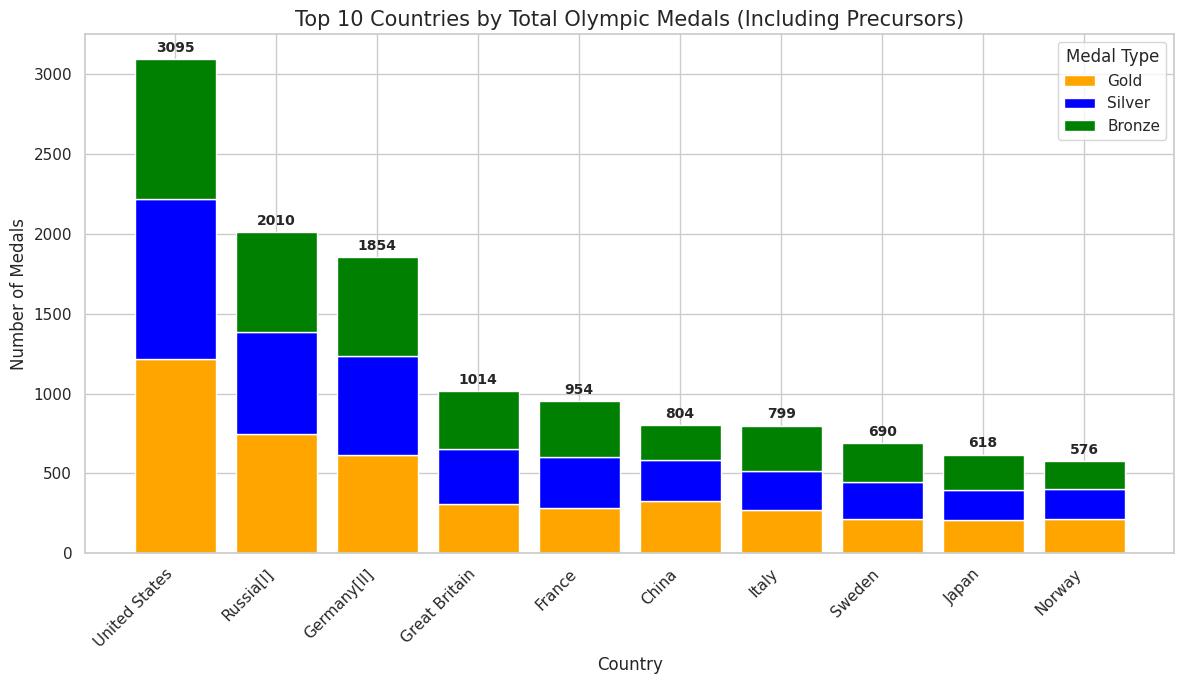

In [45]:
top10=df_includeTol.sort_values("Total", ascending=False).head(10)
plt.figure(figsize=(12, 7))
bars_gold=plt.bar(top10["Nation"], top10["Gold"], label="Gold", color="orange")
bars_silver=plt.bar(top10["Nation"], top10["Silver"], bottom=top10["Gold"], label="Silver", color="blue")
bars_bronze = plt.bar(top10["Nation"], top10["Bronze"], bottom=top10["Gold"] + top10["Silver"],label="Bronze", color="green")
plt.bar_label(bars_bronze, labels=top10["Total"], padding=3, fontsize=10, fontweight="bold")
plt.title("Top 10 Countries by Total Olympic Medals (Including Precursors)", fontsize=15)
plt.xlabel("Country")
plt.ylabel("Number of Medals")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Medal Type")
plt.tight_layout()
plt.show()


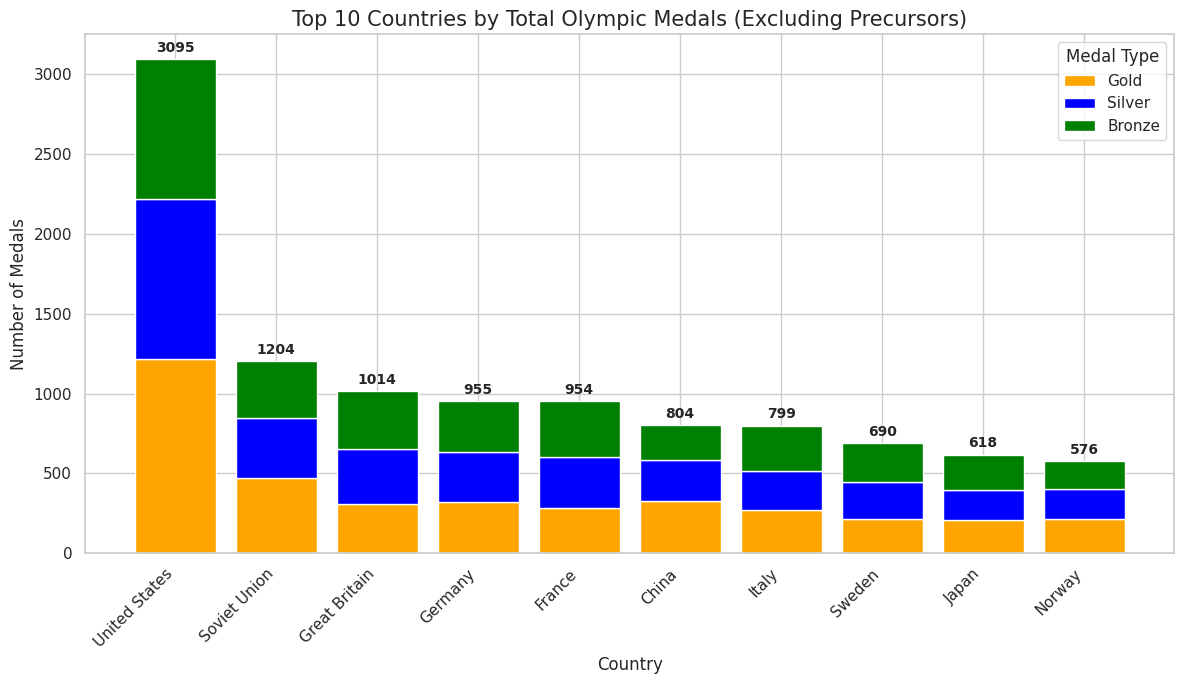

In [46]:
top10=df_excludeTol.sort_values("Total", ascending=False).head(10)
plt.figure(figsize=(12, 7))
bars_gold=plt.bar(top10["Nation"], top10["Gold"], label="Gold", color="orange")
bars_silver=plt.bar(top10["Nation"], top10["Silver"], bottom=top10["Gold"], label="Silver", color="blue")
bars_bronze = plt.bar(top10["Nation"], top10["Bronze"], bottom=top10["Gold"] + top10["Silver"],label="Bronze", color="green")
plt.bar_label(bars_bronze, labels=top10["Total"], padding=3, fontsize=10, fontweight="bold")
plt.title("Top 10 Countries by Total Olympic Medals (Excluding Precursors)", fontsize=15)
plt.xlabel("Country")
plt.ylabel("Number of Medals")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Medal Type")
plt.tight_layout()
plt.show()


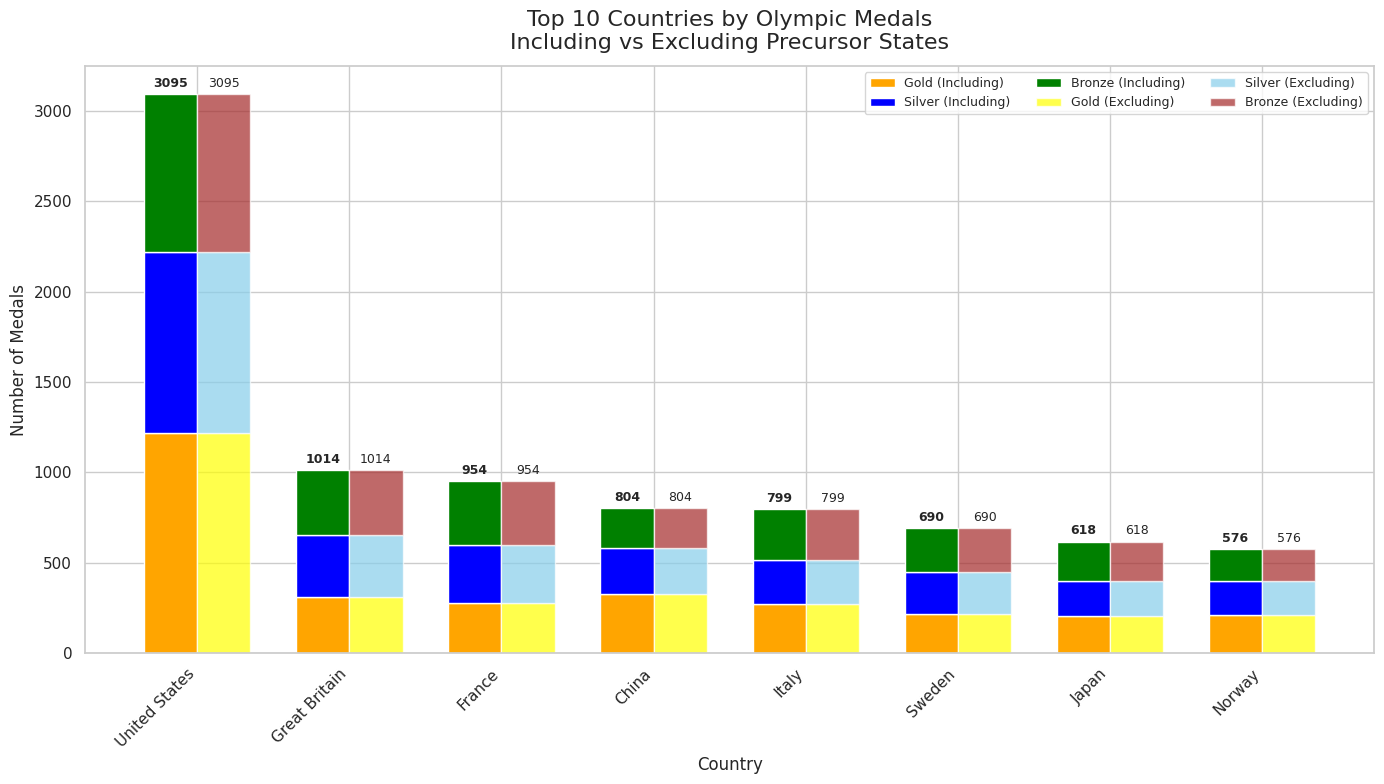

In [47]:
compare=(df_includeTol[["Nation", "Gold", "Silver", "Bronze", "Total"]].merge(
        df_excludeTol[["Nation", "Gold", "Silver", "Bronze", "Total"]],
        on="Nation",
        how="inner",
        suffixes=("_Incl", "_Excl")))
top10=compare.sort_values("Total_Incl", ascending=False).head(10)
x=np.arange(len(top10))
width=0.35
plt.figure(figsize=(14, 8))
bars_inc_gold=plt.bar(x-width/2, top10["Gold_Incl"], width, label="Gold (Including)", color="orange")
bars_inc_silver=plt.bar(x-width/2, top10["Silver_Incl"], width, bottom=top10["Gold_Incl"], label="Silver (Including)", color="blue")
bars_inc_bronze=plt.bar(x-width/2, top10["Bronze_Incl"], width, bottom=top10["Gold_Incl"] + top10["Silver_Incl"], label="Bronze (Including)", color="green")
bars_exc_gold=plt.bar(x+width/2, top10["Gold_Excl"], width, alpha=0.7, label="Gold (Excluding)", color="yellow")
bars_exc_silver=plt.bar(x+width/2, top10["Silver_Excl"], width, bottom=top10["Gold_Excl"], alpha=0.7, label="Silver (Excluding)", color="skyblue")
bars_exc_bronze=plt.bar(x+width/2, top10["Bronze_Excl"], width, bottom=top10["Gold_Excl"] + top10["Silver_Excl"], alpha=0.7, label="Bronze (Excluding)", color="brown")
plt.bar_label(bars_inc_bronze, labels=top10["Total_Incl"], padding=3, fontsize=9, fontweight="bold")
plt.bar_label(bars_exc_bronze, labels=top10["Total_Excl"], padding=3, fontsize=9)
plt.xticks(x, top10["Nation"], rotation=45, ha="right")
plt.xlabel("Country")
plt.ylabel("Number of Medals")
plt.title("Top 10 Countries by Olympic Medals\nIncluding vs Excluding Precursor States", fontsize=16, pad=12)
plt.legend(ncol=3, fontsize=9)
plt.tight_layout()
plt.show()


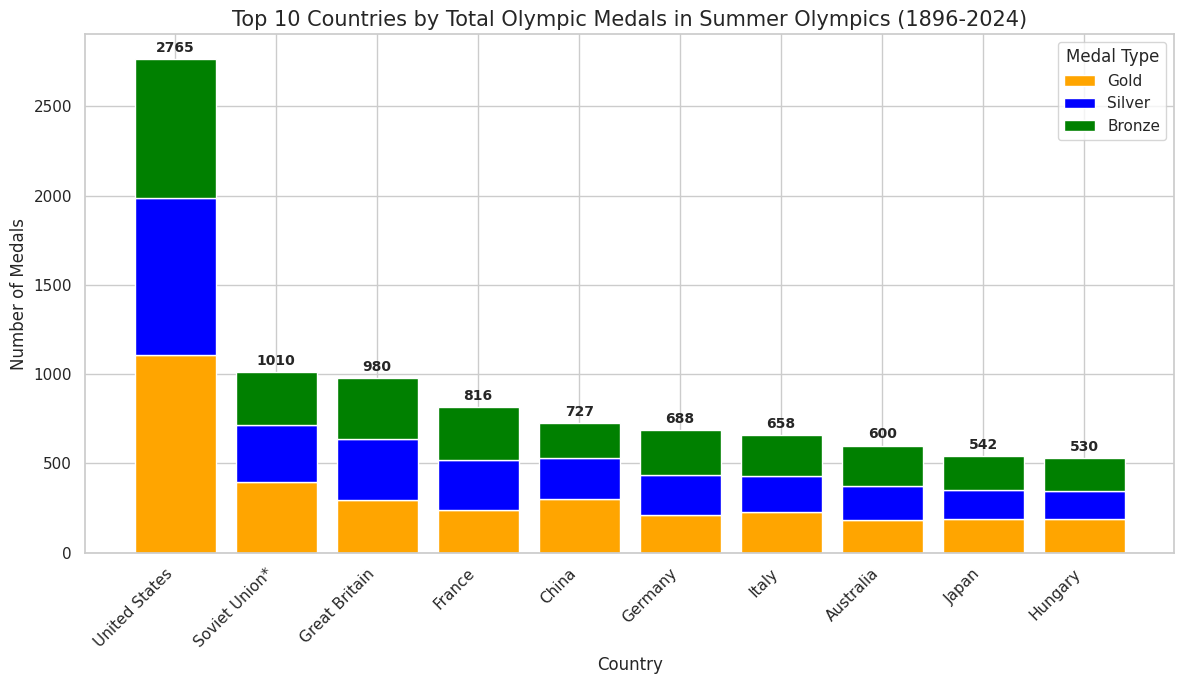

In [48]:
top10=df_completeSum.sort_values("Total", ascending=False).head(10)
plt.figure(figsize=(12, 7))
bars_gold=plt.bar(top10["NOC"], top10["Gold"], label="Gold", color="orange")
bars_silver=plt.bar(top10["NOC"], top10["Silver"], bottom=top10["Gold"], label="Silver", color="blue")
bars_bronze = plt.bar(top10["NOC"], top10["Bronze"], bottom=top10["Gold"] + top10["Silver"],label="Bronze", color="green")
plt.bar_label(bars_bronze, labels=top10["Total"], padding=3, fontsize=10, fontweight="bold")
plt.title("Top 10 Countries by Total Olympic Medals in Summer Olympics (1896-2024)", fontsize=15)
plt.xlabel("Country")
plt.ylabel("Number of Medals")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Medal Type")
plt.tight_layout()
plt.show()


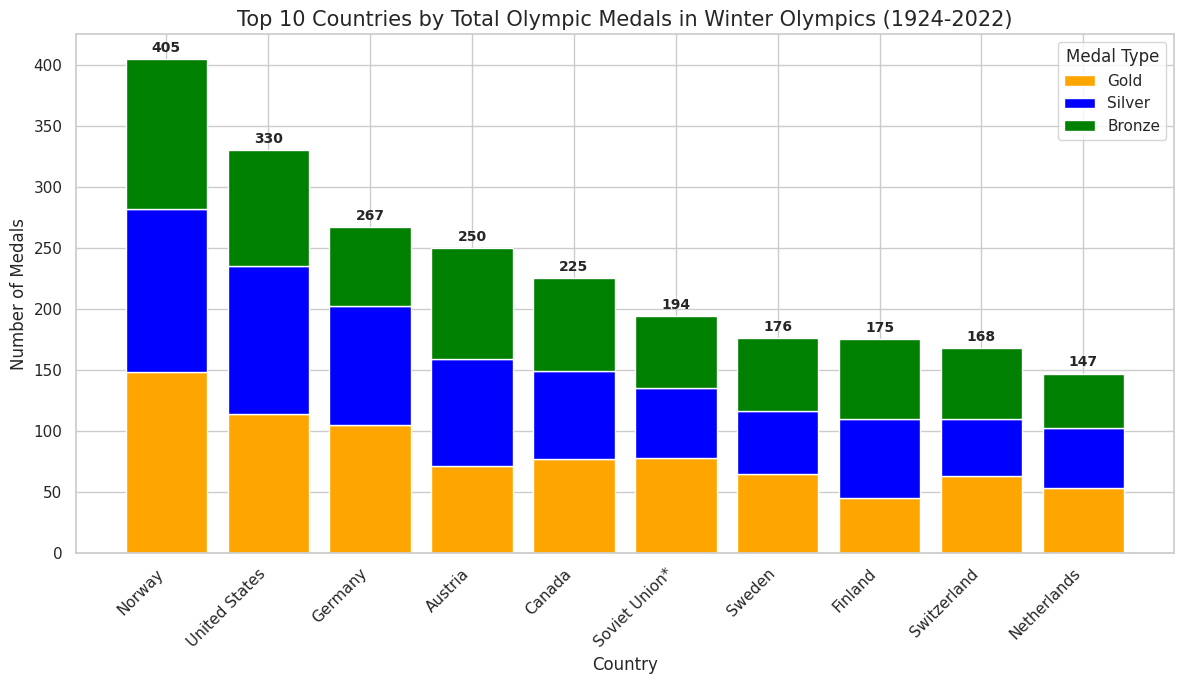

In [49]:
top10=df_completeWin.sort_values("Total", ascending=False).head(10)
plt.figure(figsize=(12, 7))
bars_gold=plt.bar(top10["NOC"], top10["Gold"], label="Gold", color="orange")
bars_silver=plt.bar(top10["NOC"], top10["Silver"], bottom=top10["Gold"], label="Silver", color="blue")
bars_bronze=plt.bar(top10["NOC"], top10["Bronze"], bottom=top10["Gold"] + top10["Silver"], label="Bronze", color="green")
plt.bar_label(bars_bronze, labels=top10["Total"], padding=3, fontsize=10, fontweight="bold")
plt.title("Top 10 Countries by Total Olympic Medals in Winter Olympics (1924-2022)", fontsize=15)
plt.xlabel("Country")
plt.ylabel("Number of Medals")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Medal Type")
plt.tight_layout()
plt.show()


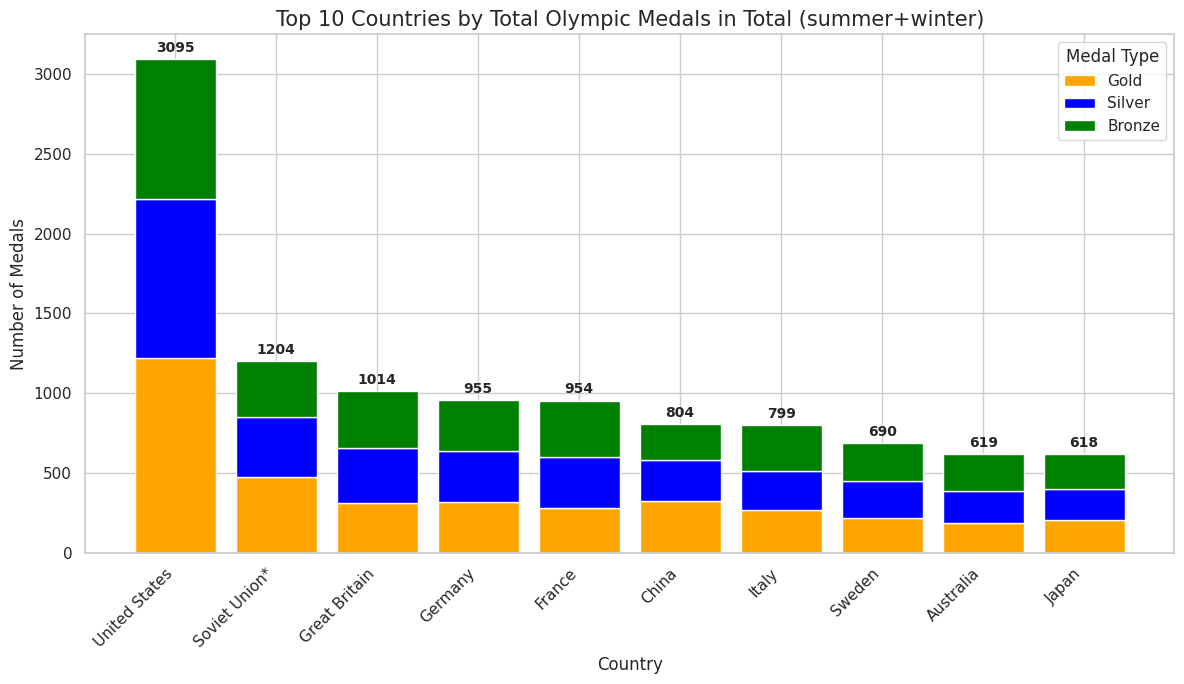

In [50]:
top10=df_completeTol.sort_values("Total", ascending=False).head(10)
plt.figure(figsize=(12, 7))
bars_gold=plt.bar(top10["NOC"], top10["Gold"], label="Gold", color="orange")
bars_silver=plt.bar(top10["NOC"], top10["Silver"], bottom=top10["Gold"], label="Silver", color="blue")
bars_bronze = plt.bar(top10["NOC"], top10["Bronze"], bottom=top10["Gold"] + top10["Silver"], label="Bronze", color="green")
plt.bar_label(bars_bronze, labels=top10["Total"], padding=3, fontsize=10, fontweight="bold")
plt.title("Top 10 Countries by Total Olympic Medals in Total (summer+winter)", fontsize=15)
plt.xlabel("Country")
plt.ylabel("Number of Medals")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Medal Type")
plt.tight_layout()
plt.show()


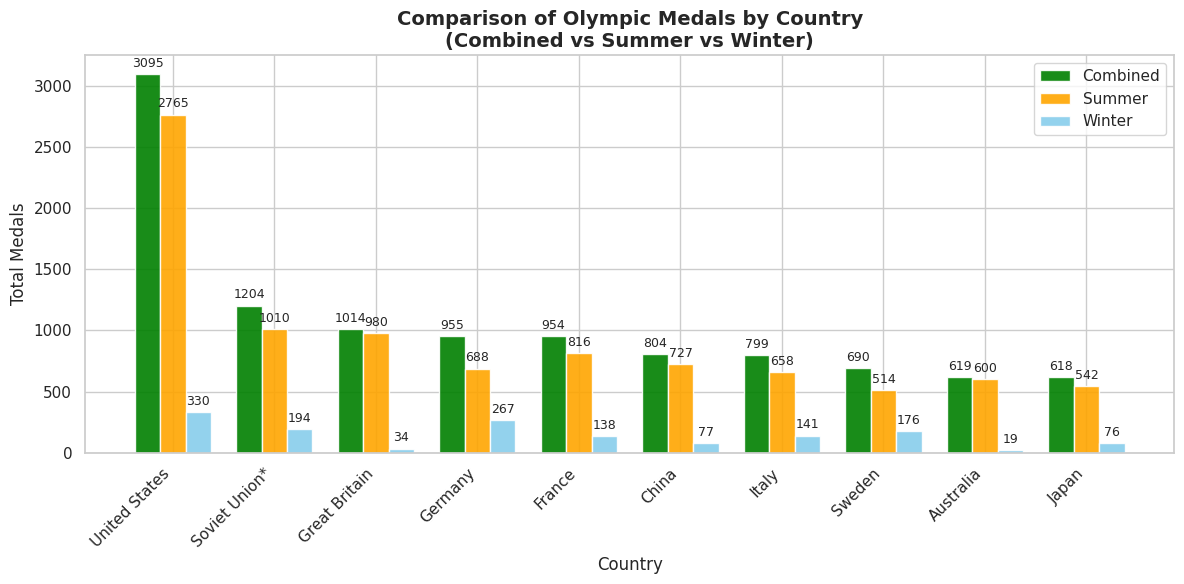

In [51]:
top_countries=(df_completeTol.sort_values("Total", ascending=False).head(10)["NOC"])
combined=df_completeTol.set_index("NOC").loc[top_countries]["Total"]
summer=df_completeSum.set_index("NOC").loc[top_countries]["Total"]
winter=df_completeWin.set_index("NOC").loc[top_countries]["Total"]
plot_df=pd.DataFrame({"Combined": combined, "Summer": summer, "Winter": winter})
fig, ax=plt.subplots(figsize=(12, 6))
x=range(len(plot_df))
width=0.25
bars1=ax.bar([i-width for i in x], plot_df["Combined"], width, label="Combined", alpha=0.9, color="green")
bars2=ax.bar(x, plot_df["Summer"], width, label="Summer", alpha=0.9, color="orange")
bars3=ax.bar([i+width for i in x], plot_df["Winter"], width, label="Winter", alpha=0.9, color="skyblue")
ax.set_title("Comparison of Olympic Medals by Country\n(Combined vs Summer vs Winter)", fontsize=14, weight="bold")
ax.set_xlabel("Country")
ax.set_ylabel("Total Medals")
ax.set_xticks(x)
ax.set_xticklabels(plot_df.index, rotation=45, ha="right")
ax.bar_label(bars1, padding=3, fontsize=9)
ax.bar_label(bars2, padding=3, fontsize=9)
ax.bar_label(bars3, padding=3, fontsize=9)
ax.legend()
plt.tight_layout()
plt.show()


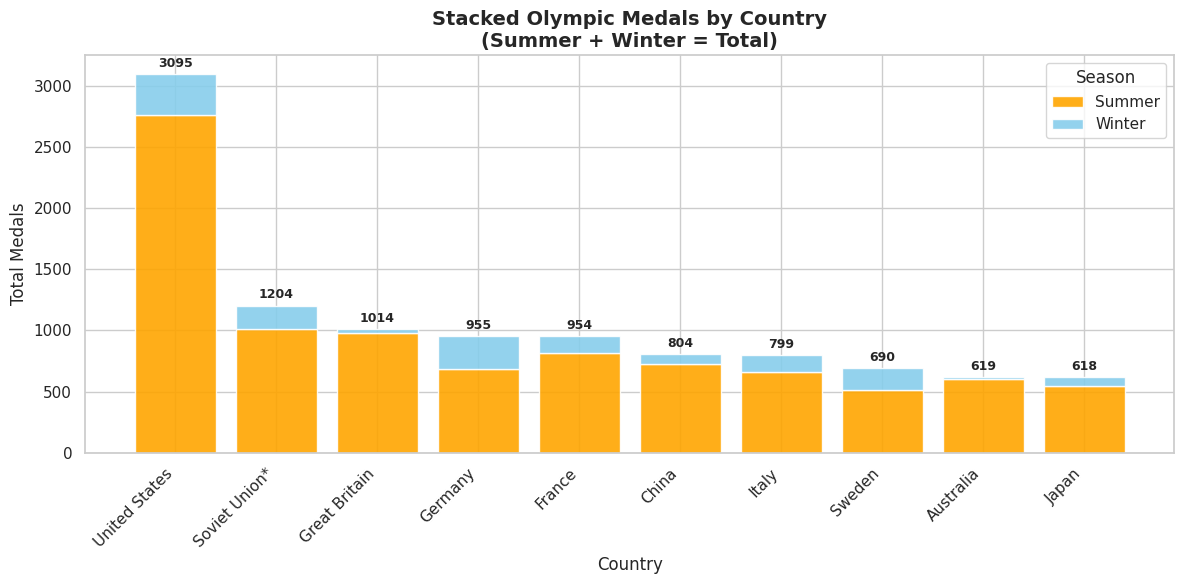

In [52]:
top_countries=(df_completeTol.sort_values("Total", ascending=False).head(10)["NOC"])
summer=df_completeSum.set_index("NOC").loc[top_countries]["Total"]
winter=df_completeWin.set_index("NOC").loc[top_countries]["Total"]
plot_df=pd.DataFrame({"Summer": summer, "Winter": winter})
plt.figure(figsize=(12, 6))
bars_summer=plt.bar(plot_df.index, plot_df["Summer"], label="Summer", color="orange", alpha=0.9)
bars_winter=plt.bar(plot_df.index, plot_df["Winter"], bottom=plot_df["Summer"], label="Winter", color="skyblue", alpha=0.9)
total=plot_df["Summer"] + plot_df["Winter"]
plt.bar_label(bars_winter, labels=total, padding=3, fontsize=9, fontweight="bold")
plt.title("Stacked Olympic Medals by Country\n(Summer + Winter = Total)", fontsize=14, weight="bold")
plt.xlabel("Country")
plt.ylabel("Total Medals")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Season")
plt.tight_layout()
plt.show()


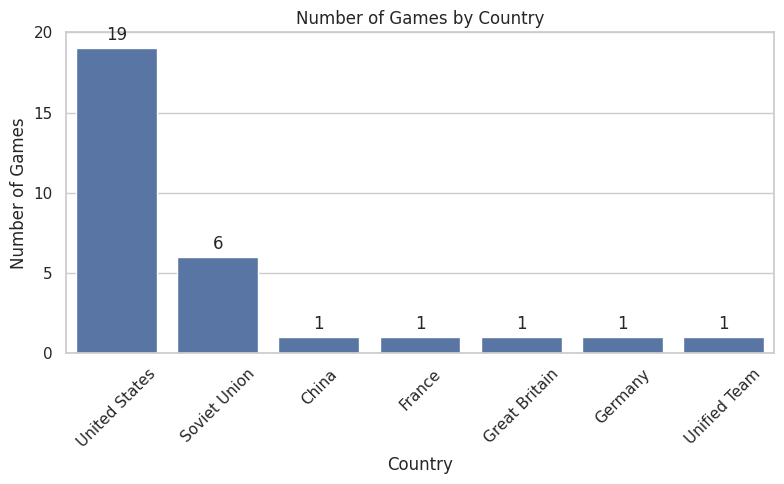

In [53]:
df_leaderSum["Number of games"]=df_leaderSum["Number of games"].apply(lambda x: x if isinstance(x, int) else int(x.split()[0]))
plt.figure(figsize=(8,5))
ax=sns.barplot(data=df_leaderSum, x="Country", y="Number of games")
ax.bar_label(ax.containers[0], padding=3)
plt.xlabel("Country")
plt.ylabel("Number of Games")
plt.title("Number of Games by Country")
plt.xticks(rotation=45)
plt.ylim(0, 20)
plt.yticks([0,5,10,15,20])
plt.tight_layout()
plt.show()


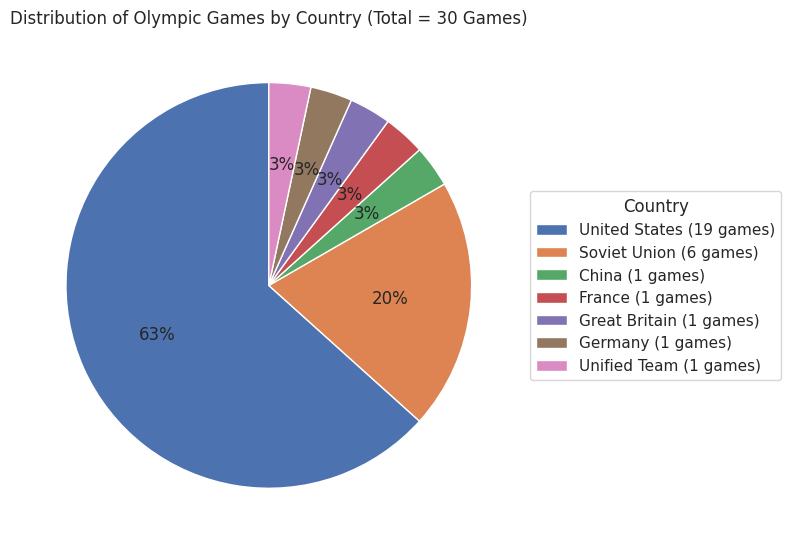

In [54]:
plt.figure(figsize=(8,8))
plt.pie(df_leaderSum["Number of games"], autopct="%1.0f%%", startangle=90)
plt.title("Distribution of Olympic Games by Country (Total = 30 Games)")
legend_labels=df_leaderSum.apply(lambda row: f"{row['Country']} ({row['Number of games']} games)", axis=1)
plt.legend(legend_labels, title="Country", loc="center left", bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()


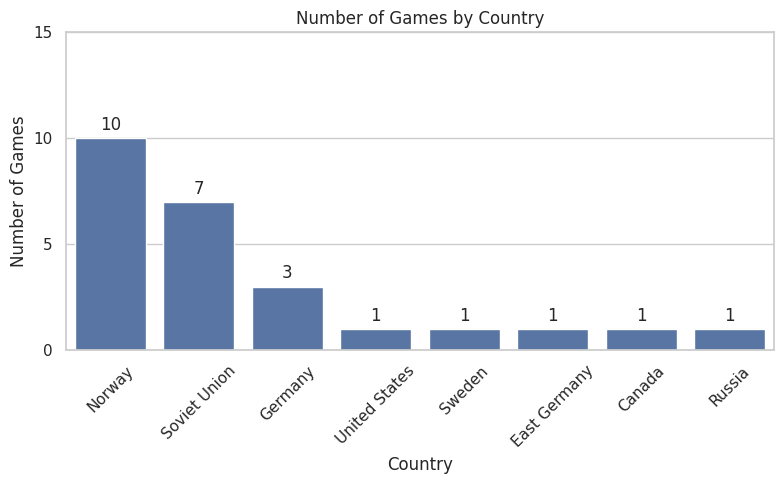

In [55]:
df_leaderWin["Number of games"]=df_leaderWin["Number of games"].apply(lambda x: x if isinstance(x, int) else int(x.split()[0]))
plt.figure(figsize=(8,5))
ax=sns.barplot(data=df_leaderWin, x="Country", y="Number of games")
ax.bar_label(ax.containers[0], padding=3)
plt.xlabel("Country")
plt.ylabel("Number of Games")
plt.title("Number of Games by Country")
plt.xticks(rotation=45)
plt.ylim(0, 15)
plt.yticks([0,5,10,15])
plt.tight_layout()
plt.show()


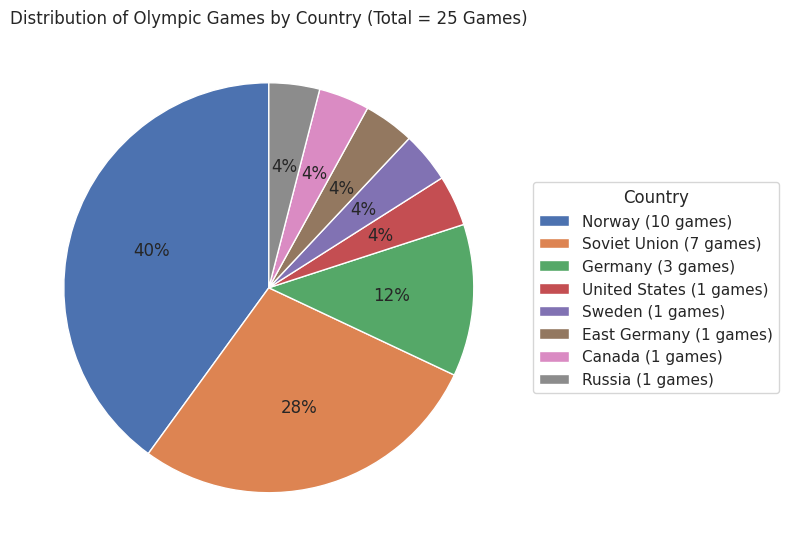

In [56]:
plt.figure(figsize=(8,8))
plt.pie(df_leaderWin["Number of games"], autopct="%1.0f%%", startangle=90)
plt.title("Distribution of Olympic Games by Country (Total = 25 Games)")
legend_labels=df_leaderWin.apply(lambda row: f"{row['Country']} ({row['Number of games']} games)", axis=1)
plt.legend(legend_labels, title="Country", loc="center left", bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()


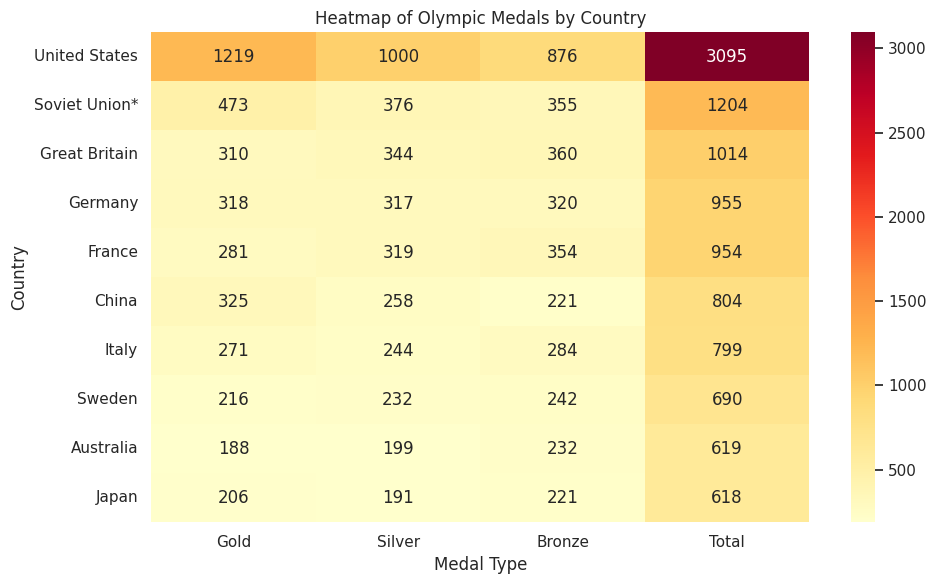

In [57]:
heatmap_data=top10.set_index("NOC")[["Gold", "Silver", "Bronze", "Total"]]
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlOrRd")
plt.title("Heatmap of Olympic Medals by Country")
plt.xlabel("Medal Type")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


## 6. Save Cleaned Data

In [58]:
df_includeTol.to_csv("include_precursors_cleaned.csv", index=False)

In [59]:
df_excludeTol.to_csv("exclude_precursors_cleaned.csv", index=False)

In [60]:
df_completeSum.to_csv("summer_olympics_cleaned.csv", index=False)

In [61]:
df_completeWin.to_csv("winter_olypics_cleaned.csv", index=False)

In [62]:
df_completeTol.to_csv("combine_total_cleaned.csv", index=False)

In [63]:
df_leaderSum.to_csv("occurence_summer_cleaned.csv", index=False)

In [64]:
df_completeWin.to_csv("occurence_winter_cleaned.csv", index=False)